In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### __Get Data__

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.isnull().sum() # There are no NULL Values in any rows but by observing above columns we find '?'.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [404]:
df.isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### __Correlation of features with price__(A small study to pick important features)

In [405]:
new_df = df.copy()
new_df.drop(new_df.loc[new_df['bore'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['stroke'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['horsepower'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['peak-rpm'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['price'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['num-of-doors'] == '?'].index, axis=0, inplace=True)
new_df.drop(new_df.loc[new_df['normalized-losses'] == '?'].index, axis=0, inplace=True)

new_df['price'] = new_df['price'].astype(float)
new_df['horsepower'] = new_df['horsepower'].astype(float)
new_df['compression-ratio'] = new_df['compression-ratio'].astype(float)
new_df['bore'] = new_df['bore'].astype(float)
new_df['stroke'] = new_df['stroke'].astype(float)
new_df['wheel-base'] = new_df['wheel-base'].astype(float)
new_df['peak-rpm'] = new_df['peak-rpm'].astype(float)
new_df['normalized-losses'] = new_df['normalized-losses'].astype(float)

new_df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [406]:
cm = new_df.corr()
cm['price']

symboling           -0.162794
normalized-losses    0.202761
wheel-base           0.734419
length               0.760952
width                0.843371
height               0.244836
curb-weight          0.893639
engine-size          0.841496
bore                 0.533890
stroke               0.160664
compression-ratio    0.209361
horsepower           0.759874
peak-rpm            -0.171916
city-mpg            -0.692273
highway-mpg         -0.720090
price                1.000000
Name: price, dtype: float64

##  __By the above analysis we can pick few features for further data analysis and Machine Learning.__

In [407]:
# As we have many missing values in normalized-losses and it has less correlation with price we will remove the column completely.
df.drop(['normalized-losses'],axis = 1, inplace = True )

In [408]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [409]:
features = ['make','fuel-type','num-of-doors','aspiration','body-style','drive-wheels','engine-location','wheel-base','length','width'
           ,'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','horsepower','city-mpg','highway-mpg','price']

In [410]:
# Create a new data frame with required features.
cars = df.loc[:,features]

In [428]:
# Delete rows with missing values in price column and change price column to float for analysis
cars.drop(df.loc[df['price']=='?'].index,axis = 0,inplace = True)
cars['price'] = cars['price'].astype(float)
# Horsepower is a continuous variable , so we change it to int but before we change it to int we must deal with missing values.
cars.drop(df.loc[df['horsepower']=='?'].index,axis = 0,inplace = True)
cars['horsepower'] = cars['horsepower'].astype(int)

In [429]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              199 non-null    object 
 1   fuel-type         199 non-null    object 
 2   num-of-doors      199 non-null    object 
 3   aspiration        199 non-null    object 
 4   body-style        199 non-null    object 
 5   drive-wheels      199 non-null    object 
 6   engine-location   199 non-null    object 
 7   wheel-base        199 non-null    float64
 8   length            199 non-null    float64
 9   width             199 non-null    float64
 10  curb-weight       199 non-null    int64  
 11  engine-type       199 non-null    object 
 12  num-of-cylinders  199 non-null    object 
 13  engine-size       199 non-null    int64  
 14  fuel-system       199 non-null    object 
 15  horsepower        199 non-null    int32  
 16  city-mpg          199 non-null    int64  
 1

In [430]:
categorical_list = ['make','fuel-type','num-of-doors','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
continuous_list = ['wheel-base','length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','price']

# Univariate Analysis

## Categorical Variables

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64 


gas       179
diesel     20
Name: fuel-type, dtype: int64 


four    112
two      85
?         2
Name: num-of-doors, dtype: int64 


std      163
turbo     36
Name: aspiration, dtype: int64 


sedan          94
hatchback      67
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64 


fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64 


front    196
rear       3
Name: engine-location, dtype: int64 


ohc      143
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtyp

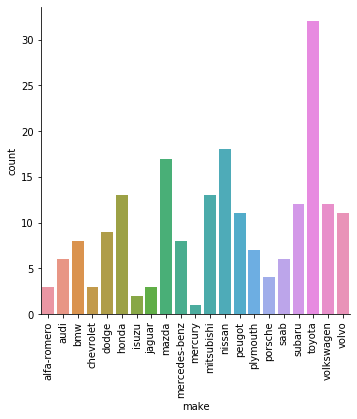

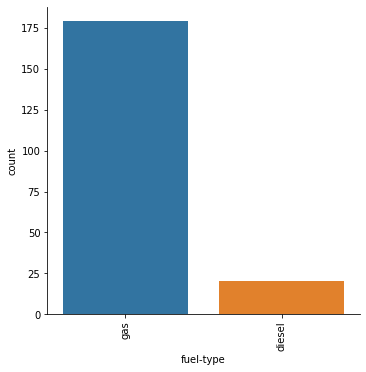

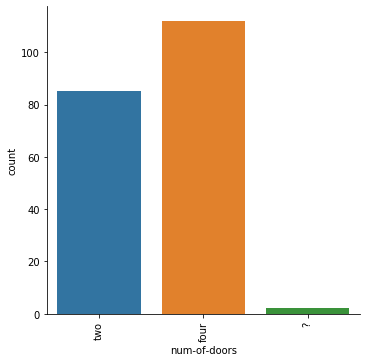

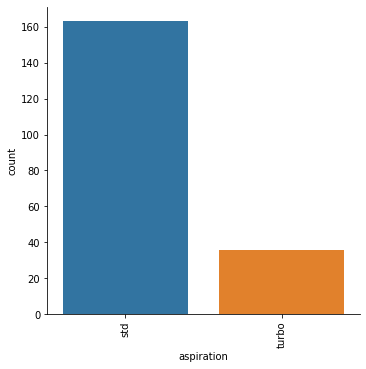

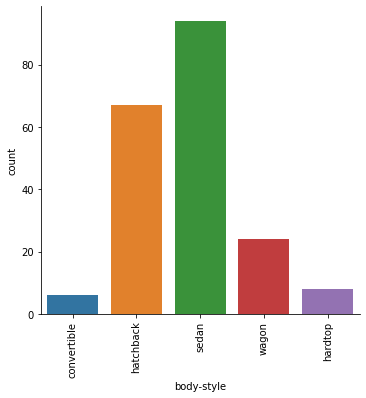

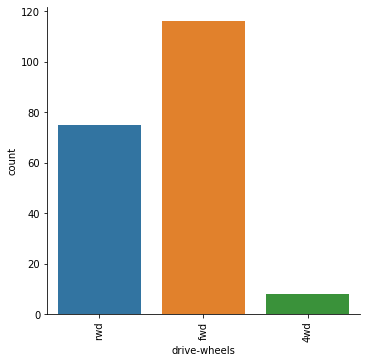

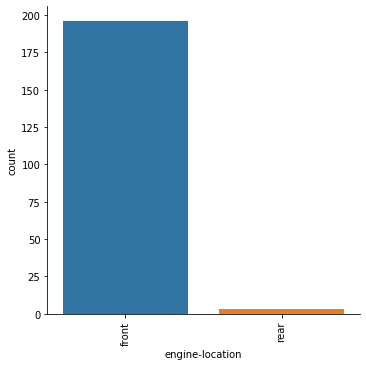

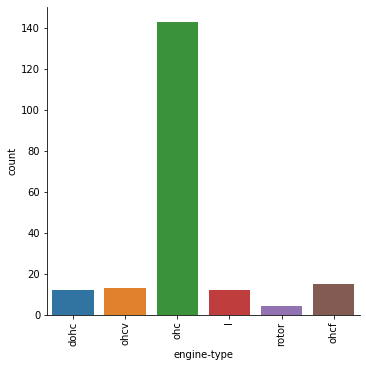

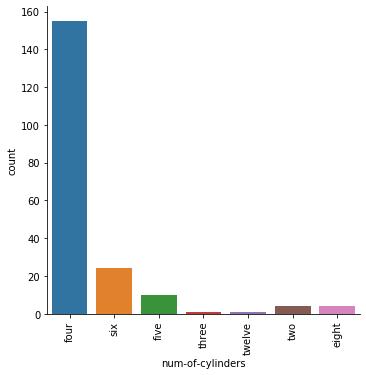

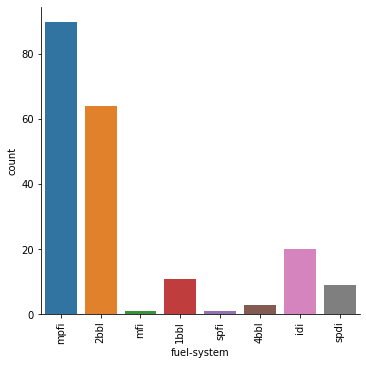

In [431]:
for variable in categorical_list:
    print(cars[variable].value_counts(),'\n\n')
    ax = sns.catplot(x = variable, data = cars, kind = 'count')
    ax.set_xticklabels(rotation =90)

### Continuous Variables

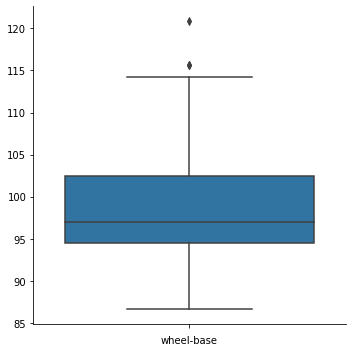

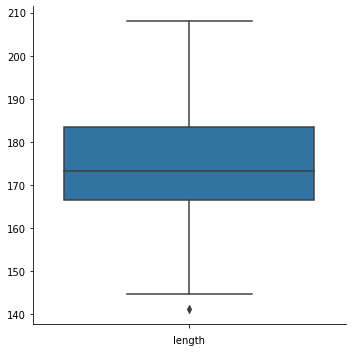

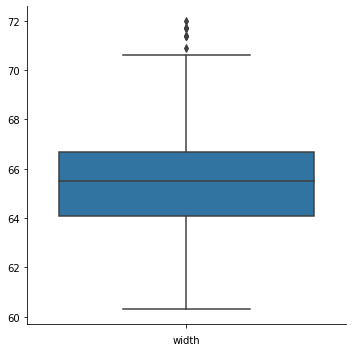

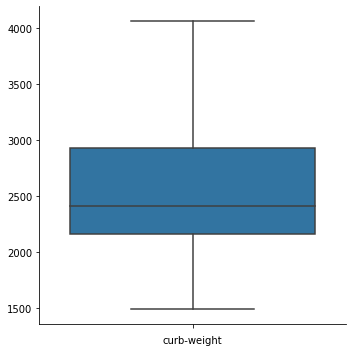

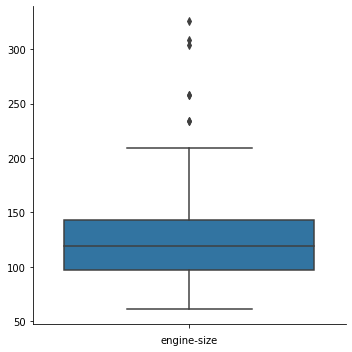

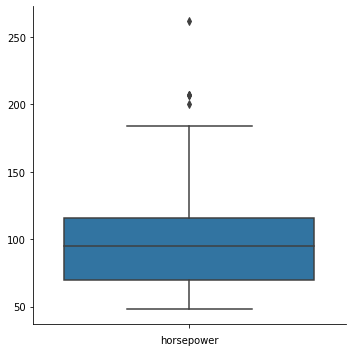

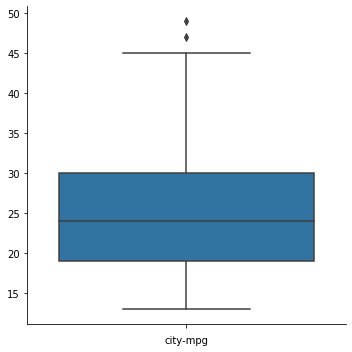

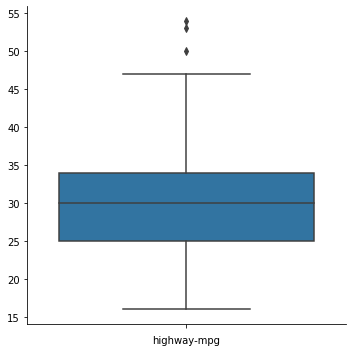

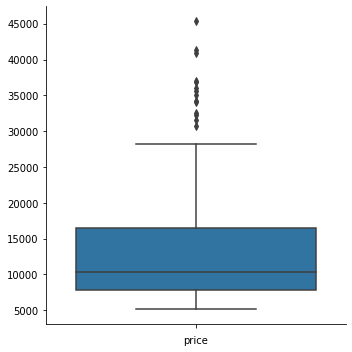

In [432]:
for variable in continuous_list:
    sns.catplot(variable,data=cars,orient='vertical',kind='box')

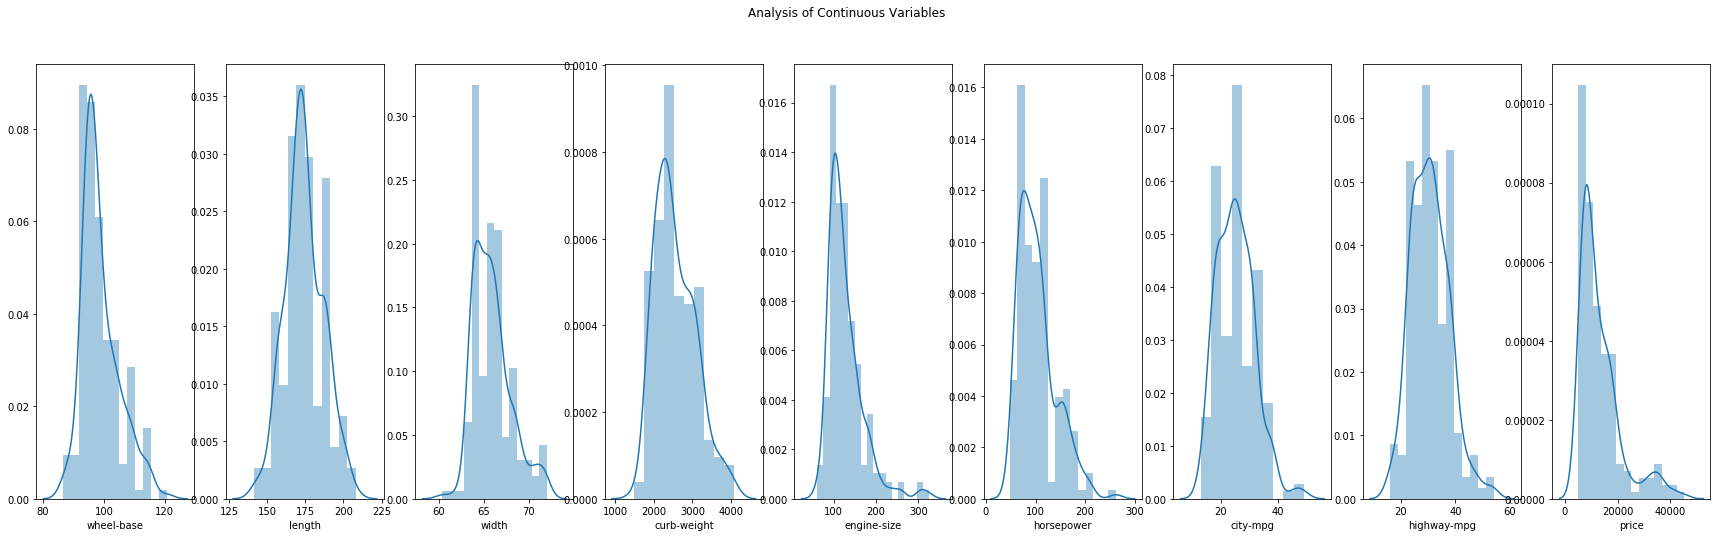

In [433]:
fig,ax = plt.subplots(1,len(continuous_list))
i = 0
fig.suptitle('Analysis of Continuous Variables')
fig.set_size_inches(30,8,forward = True)
for variable in continuous_list:
    sns.distplot(cars[variable],ax = ax[i])
    i+=1

## Bivariate Analysis

In [434]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

## Categorical Vs Continuous

### make vs price

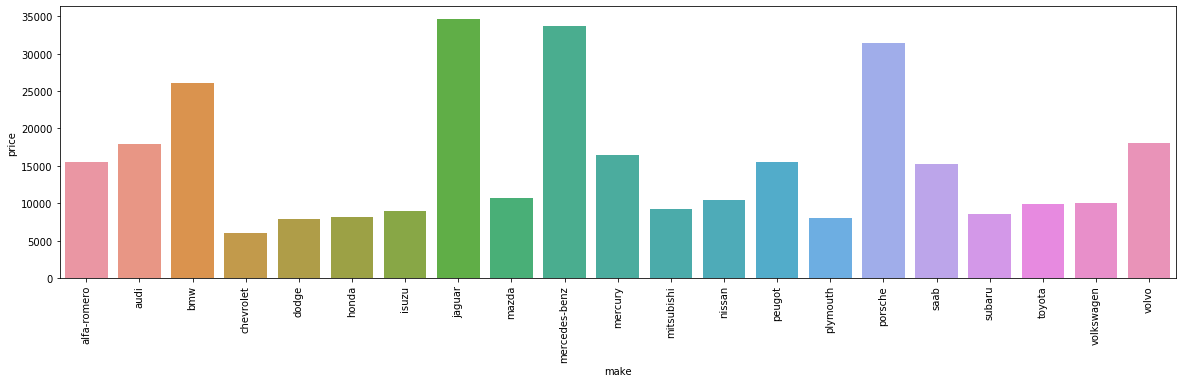

In [435]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation = 'vertical')
sns.barplot(x = 'make', y= 'price', data= cars , ci=False)

### fuel-type vs price

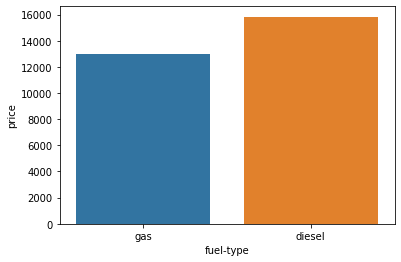

In [436]:
sns.barplot(x='fuel-type', y='price',data=cars, ci= False)

### aspiration vs price

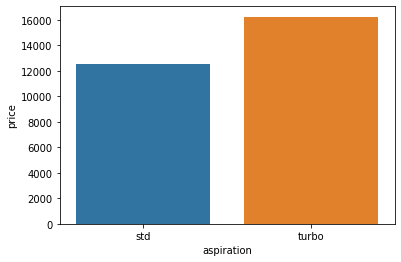

In [437]:
sns.barplot(x = 'aspiration', y = 'price', data = cars , ci= False)

### body-style vs price

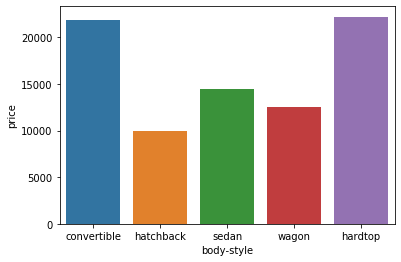

In [438]:
sns.barplot(x = 'body-style', y = 'price', data = cars , ci= False)

### drive-wheels vs price

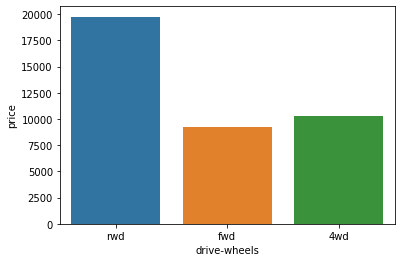

In [439]:
sns.barplot(x = 'drive-wheels', y = 'price', data = cars , ci= False)

### engine-location vs price

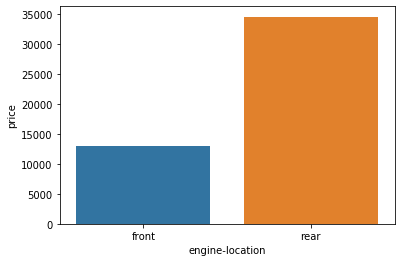

In [440]:
sns.barplot(x = 'engine-location', y = 'price', data = cars , ci= False)

### engine-type vs price

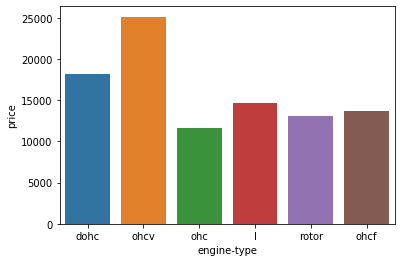

In [441]:
sns.barplot(x = 'engine-type', y = 'price', data = cars , ci= False)

### num-of-cylinders vs price

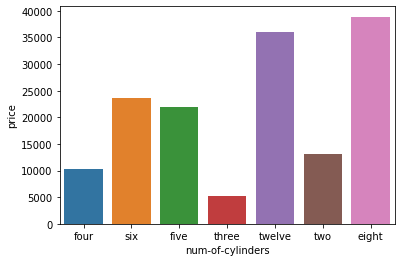

In [442]:
sns.barplot(x = 'num-of-cylinders', y = 'price', data = cars , ci= False)

### fuel-system vs price

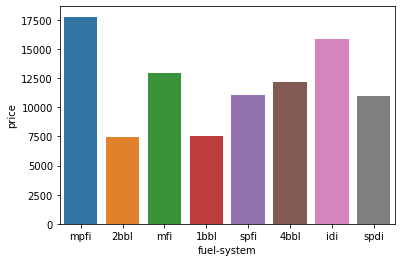

In [443]:
sns.barplot(x = 'fuel-system', y = 'price', data = cars , ci= False)

## continuous vs continuous

### horse-power vs price

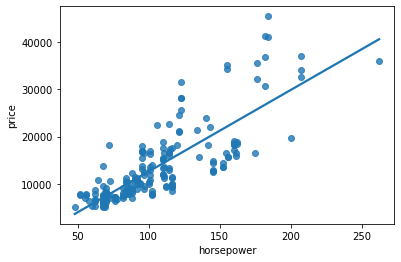

In [444]:
sns.regplot(x = 'horsepower', y = 'price', data = cars , ci= False)

### city-mpg vs price

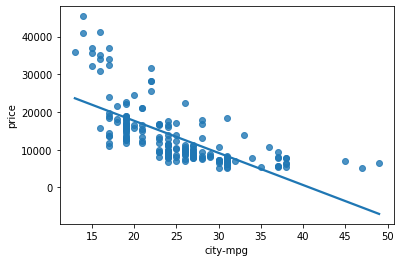

In [445]:
sns.regplot(x = 'city-mpg', y = 'price', data = cars , ci= False)

### highway-mpg vs price

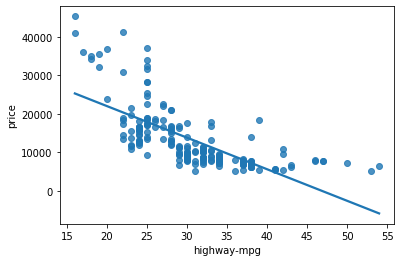

In [446]:
sns.regplot(x = 'highway-mpg', y = 'price', data = cars , ci= False)

## length vs price

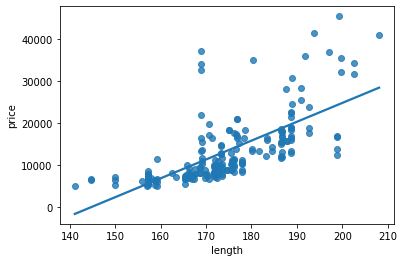

In [448]:
sns.regplot(x = 'length', y = 'price', data = cars , ci= False)

## width vs price

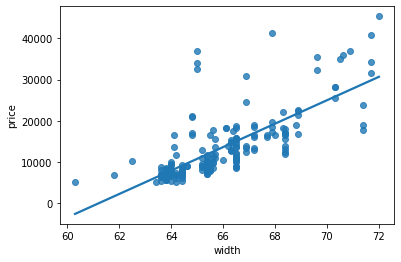

In [449]:
sns.regplot(x = 'width', y = 'price', data = cars , ci= False)

## curb-weight vs price

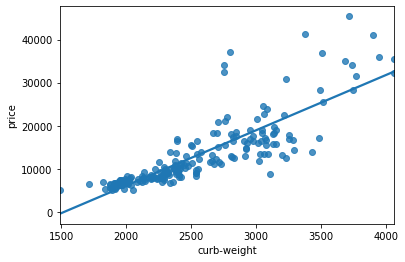

In [450]:
sns.regplot(x = 'curb-weight', y = 'price', data = cars , ci= False)

## curb-weight vs city-mpg

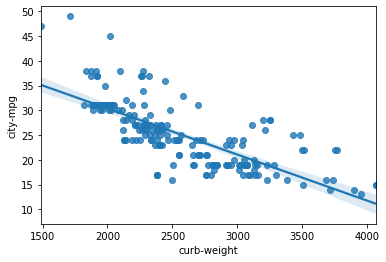

In [451]:
sns.regplot(x='curb-weight',y='city-mpg',data = cars)

## Compare city-mpg and highway-mpg for each make

In [452]:
g = cars.groupby('make',as_index=False)[['city-mpg','highway-mpg']].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

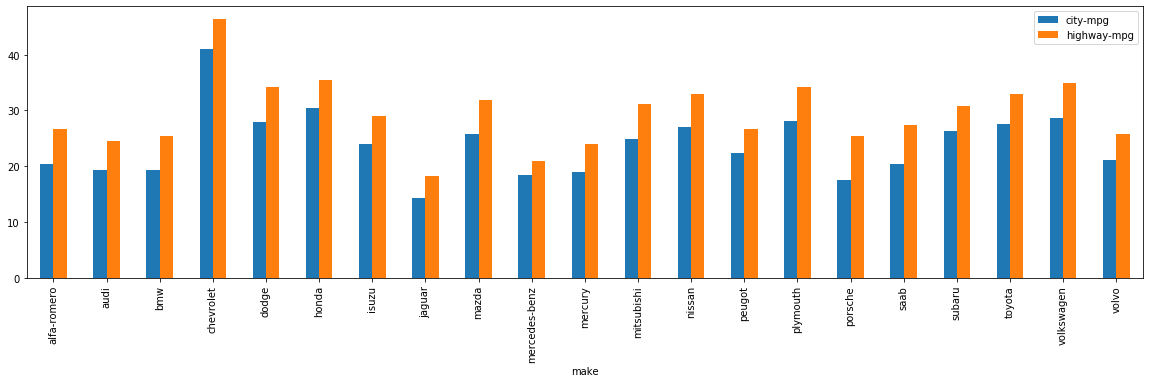

In [453]:
g.plot(x='make',kind='bar')
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation = 'vertical')

## Compare engine-size and horsepower for each make.

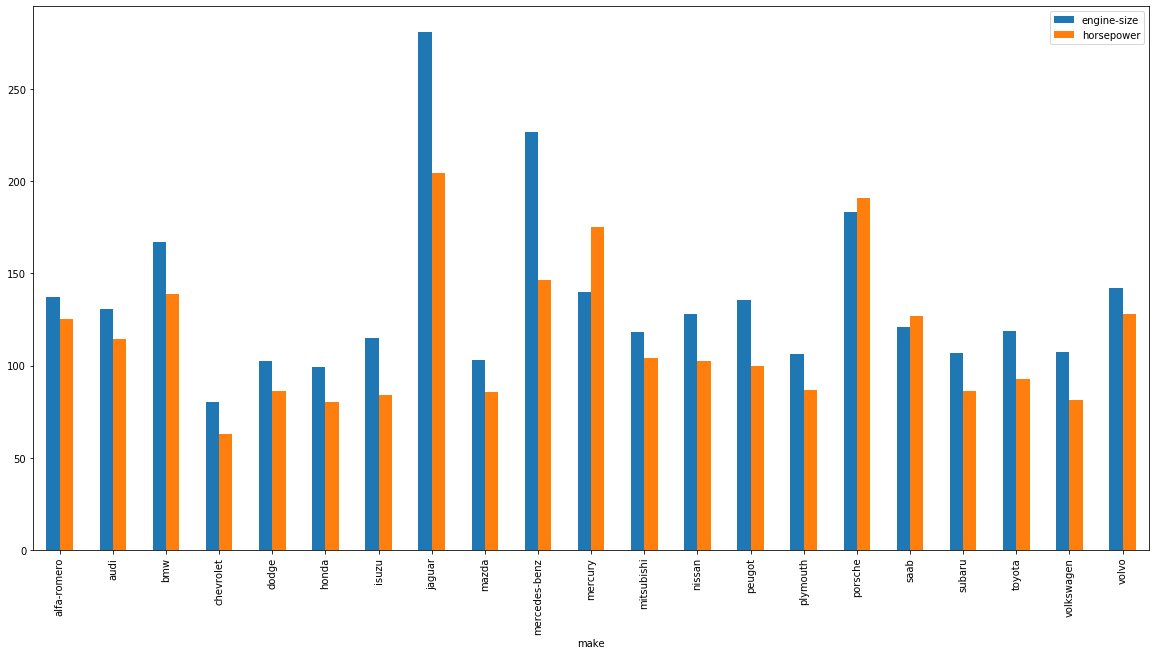

In [454]:
g = cars.groupby('make',as_index = False)[['engine-size','horsepower']].mean()
g.plot(x='make',kind = 'bar')
plt.gcf().set_size_inches(20,10)

In [455]:
# city-mpg and highway-mpg have similar correlation with price , so we can delete one.

In [456]:
cars.drop(['city-mpg'],axis=1 , inplace = True)

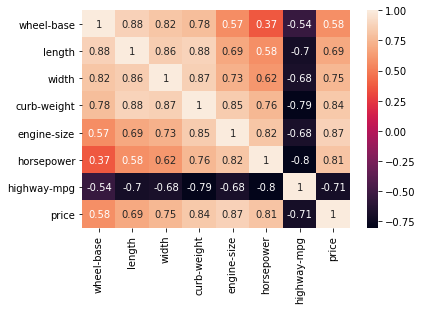

In [457]:
sns.heatmap(cars.corr(),annot =  True)

In [458]:
# wheel-base has very less correlation with price so in order to reduce our columns for better understanding we delete wheel-base column.

In [459]:
cars.drop('wheel-base',axis = 1,inplace = True)

In [460]:
cars.drop('aspiration',axis = 1,inplace = True)

# Create Final Data

In [461]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              199 non-null    object 
 1   fuel-type         199 non-null    object 
 2   num-of-doors      199 non-null    object 
 3   body-style        199 non-null    object 
 4   drive-wheels      199 non-null    object 
 5   engine-location   199 non-null    object 
 6   length            199 non-null    float64
 7   width             199 non-null    float64
 8   curb-weight       199 non-null    int64  
 9   engine-type       199 non-null    object 
 10  num-of-cylinders  199 non-null    object 
 11  engine-size       199 non-null    int64  
 12  fuel-system       199 non-null    object 
 13  horsepower        199 non-null    int32  
 14  highway-mpg       199 non-null    int64  
 15  price             199 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(9)

# Change all data into numbers with get_dummies()

In [462]:
cars = pd.get_dummies(cars)

In [463]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   199 non-null    float64
 1   width                    199 non-null    float64
 2   curb-weight              199 non-null    int64  
 3   engine-size              199 non-null    int64  
 4   horsepower               199 non-null    int32  
 5   highway-mpg              199 non-null    int64  
 6   price                    199 non-null    float64
 7   make_alfa-romero         199 non-null    uint8  
 8   make_audi                199 non-null    uint8  
 9   make_bmw                 199 non-null    uint8  
 10  make_chevrolet           199 non-null    uint8  
 11  make_dodge               199 non-null    uint8  
 12  make_honda               199 non-null    uint8  
 13  make_isuzu               199 non-null    uint8  
 14  make_jaguar              1

In [464]:
cars.to_csv('final_cars.csv',index = False)